In [1]:
# importing all libraries

import pandas as pd   
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# to supress the warnings-- especially for vizualizations
import warnings
warnings.filterwarnings('ignore')

## Understanding and Preparing the dataset

In [2]:
# getting all the dataset

Jan = pd.read_csv('202101-divvy-tripdata.csv')

feb = pd.read_csv('202102-divvy-tripdata.csv')

march = pd.read_csv('202103-divvy-tripdata.csv')

april = pd.read_csv('202104-divvy-tripdata.csv')

may = pd.read_csv('202105-divvy-tripdata.csv')

june = pd.read_csv('202106-divvy-tripdata.csv')

july = pd.read_csv('202107-divvy-tripdata.csv')

aug = pd.read_csv('202108-divvy-tripdata.csv')

sep = pd.read_csv('202109-divvy-tripdata.csv')

octo = pd.read_csv('202110-divvy-tripdata.csv')

nov = pd.read_csv('202111-divvy-tripdata.csv')

dec = pd.read_csv('202112-divvy-tripdata.csv')

In [3]:
# merging the dataset to get year-long overview 
df = pd.concat([Jan, feb, march, april, may, june, july, aug, sep, octo, nov, dec])

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


In [6]:
"""
fixing the datatypes based on the info
"""

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [7]:
"""
creating a new column to get the duration for each ride, duration may
better help in overall understanding
"""

df['ride_duration']=(df['ended_at']- df['started_at']).astype('timedelta64[m]')

In [8]:
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.7200,member,10.0
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.6900,member,4.0
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.7000,member,1.0
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.6900,member,11.0
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.7000,casual,0.0
5,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,NaN,NaN,41.900409,-87.696763,41.940000,-87.7100,casual,53.0
6,09275CC10F854E9E,electric_bike,2021-01-04 05:05:04,2021-01-04 05:10:39,California Ave & Cortez St,17660,NaN,NaN,41.900391,-87.696757,41.900000,-87.7100,member,5.0
7,DF7A32A217AEFB14,electric_bike,2021-01-14 15:07:00,2021-01-14 15:13:40,California Ave & Cortez St,17660,NaN,NaN,41.900390,-87.696728,41.910000,-87.7000,member,6.0
8,C2EFC62379EB716C,electric_bike,2021-01-09 09:57:55,2021-01-09 10:00:26,California Ave & Cortez St,17660,NaN,NaN,41.900306,-87.696796,41.900000,-87.7000,member,2.0
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.6722,member,7.0


In [9]:
# creating a backup for the dataset
df_all = df

In [10]:
# all the accents for vizualizations
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'




('BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'coolwarm',
 'coolwarm_r',
 'copper',
 'copper_r',
 'crest',
 'crest_r',
 'cubehelix',
 '

# Understanding rides in general 

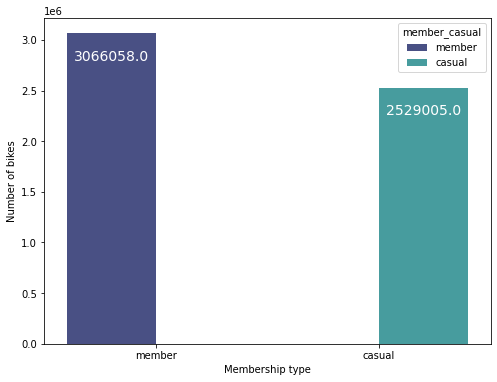

In [11]:
"""
Vizualizing the rides based on their membership
"""

# to set the figuresize
plt.figure(figsize=(8,6))

# passing the member casual for x
plot = sns.countplot(x='member_casual',data=df, 
              palette='mako', hue='member_casual')

# setting the axes labels
plot.set_xlabel("Membership type")
plot.set_ylabel("Number of bikes")

# to annotate the exact numbers
for p in plot.patches:
    plot.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
    

# Understanding rides by Month

In [12]:
# creating a column to get the name of the month, the ride started

df['start_month'] = df['started_at'].dt.month_name()

Text(0, 0.5, 'Membership Type')

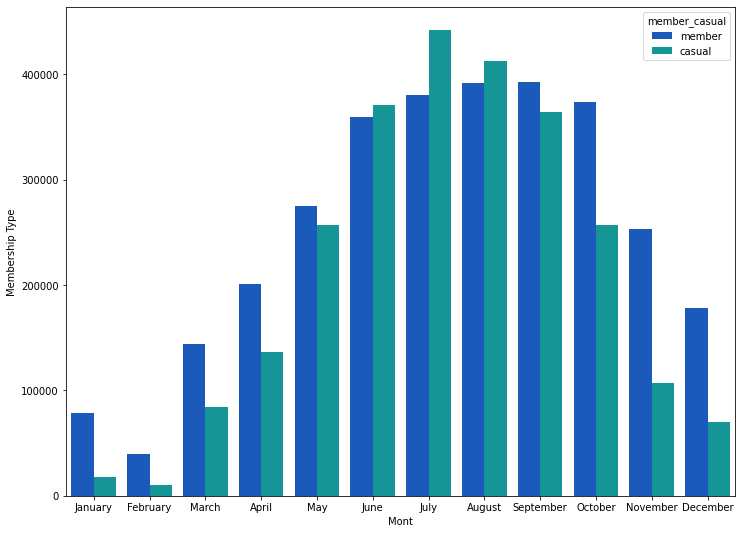

In [13]:
"""
Vizualizing the rides based on their when they rode the bikes
"""

# to set the figuresize
plt.figure(figsize=(12,9))

# passing the month for x axis and member casual for variation
plot = sns.countplot(x='start_month',data=df, 
              palette='winter', hue='member_casual')

# setting the axes labels
plot.set_xlabel("Mont")
plot.set_ylabel("Membership Type")

Clearly, the casual riders are more active during the summer, the rides in general are low during the winter

# Understanding rider's behavior based on day of the week

In [14]:
"""
adding a column-- start_date to understand the weekly behavior
"""
df['start_date']= df['started_at'].dt.day_name()

In [15]:
# filtering the columns to focus on day and other important columns
minimal = df[['rideable_type','ride_duration','member_casual','start_date']]

In [16]:
minimal.head()

,rideable_type,ride_duration,member_casual,start_date
0,electric_bike,10.0,member,Saturday
1,electric_bike,4.0,member,Wednesday
2,electric_bike,1.0,member,Thursday
3,electric_bike,11.0,member,Thursday
4,electric_bike,0.0,casual,Saturday


Text(0, 0.5, 'No. of Riders')

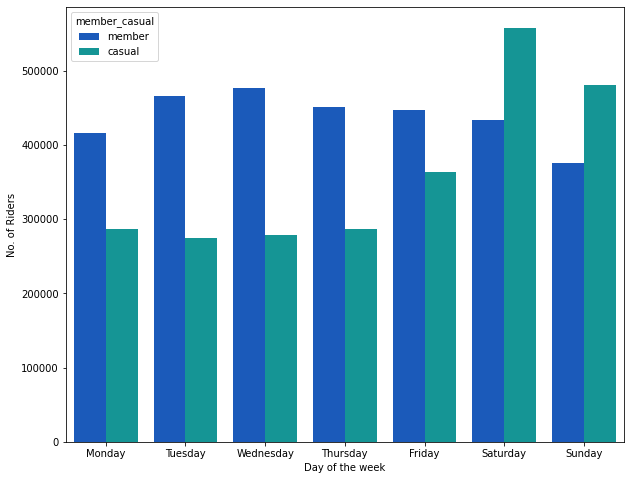

In [17]:
# vizualizing the rides based on day of the week

# to order based on the weekday
dates = ['Monday','Tuesday', 'Wednesday',
         'Thursday', 'Friday', 'Saturday', 'Sunday']


# to set the figuresize
plt.figure(figsize=(10,8))

# passing the start_date for x axis and member casual for variation
plot = sns.countplot(x='start_date',data=minimal, 
              palette='winter', hue='member_casual', order=dates)

# labeling the axes
plot.set_xlabel("Day of the week")
plot.set_ylabel("No. of Riders")


We see a rise in casual members during the weekend

# Rides from peak stations

In [18]:
"""
Analyzing the riders behavior from the five most popular stations
"""

df['start_station_name'].value_counts().head()

Streeter Dr & Grand Ave    82715
Michigan Ave & Oak St      44348
Wells St & Concord Ln      43610
Millennium Park            42223
Clark St & Elm St          41218
Name: start_station_name, dtype: int64

In [19]:
# getting the 5 bussiest stations
peak_station1 = df[df['start_station_name']=='Streeter Dr & Grand Ave']
peak_station2 = df[df['start_station_name']=='Michigan Ave & Oak St']
peak_station3 = df[df['start_station_name']=='Wells St & Concord Ln']
peak_station4 = df[df['start_station_name']=='Millennium Park']
peak_station5 = df[df['start_station_name']=='Clark St & Elm St']


In [20]:
# concatinating them 
peak_station = pd.concat([peak_station1,peak_station2,peak_station3,peak_station4,peak_station5])

In [21]:
peak_station.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,start_month,start_date
3466,E8CAB30E04984AC3,classic_bike,2021-01-10 14:58:44,2021-01-10 15:12:01,Streeter Dr & Grand Ave,13022,Lake Shore Dr & Monroe St,13300,41.892278,-87.612043,41.880958,-87.616743,member,13.0,January,Sunday
4263,D321C17A8B3B8BF1,classic_bike,2021-01-25 08:23:46,2021-01-25 08:27:48,Streeter Dr & Grand Ave,13022,Fairbanks Ct & Grand Ave,TA1305000003,41.892278,-87.612043,41.891847,-87.620580,member,4.0,January,Monday
4367,A356CE08D9B3EB9D,electric_bike,2021-01-04 08:40:34,2021-01-04 08:48:55,Streeter Dr & Grand Ave,13022,Clark St & Lake St,KA1503000012,41.892329,-87.612248,41.886814,-87.630321,member,8.0,January,Monday
5541,5C5FABE2C7C1CD77,docked_bike,2021-01-21 11:33:54,2021-01-21 12:17:56,Streeter Dr & Grand Ave,13022,MLK Jr Dr & 29th St,TA1307000139,41.892278,-87.612043,41.842052,-87.617000,casual,44.0,January,Thursday
7776,E996FBB5D623F1E4,classic_bike,2021-01-16 14:39:57,2021-01-16 15:05:23,Streeter Dr & Grand Ave,13022,Michigan Ave & Oak St,13042,41.892278,-87.612043,41.900960,-87.623777,member,25.0,January,Saturday


Text(0, 0.5, 'Count')

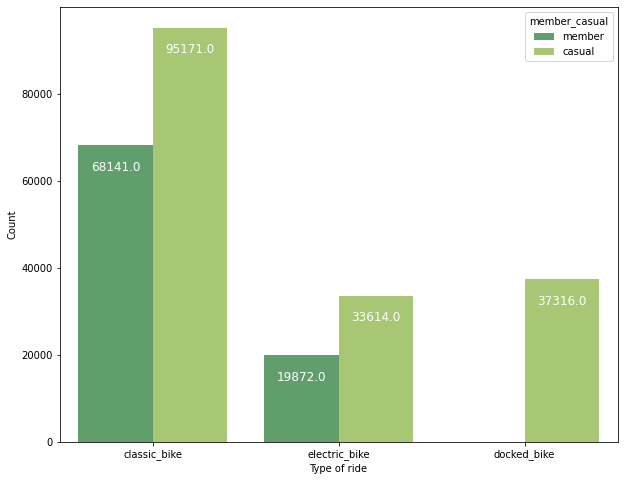

In [22]:
# to set the figuresize
plt.figure(figsize=(10,8))

peak_plot = sns.countplot(x='rideable_type',data=peak_station, 
              palette='summer',hue='member_casual')

# to annotate the exact numbers
for p in peak_plot.patches:
    peak_plot.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)
    

# to label the axes
peak_plot.set_xlabel("Type of ride")
peak_plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

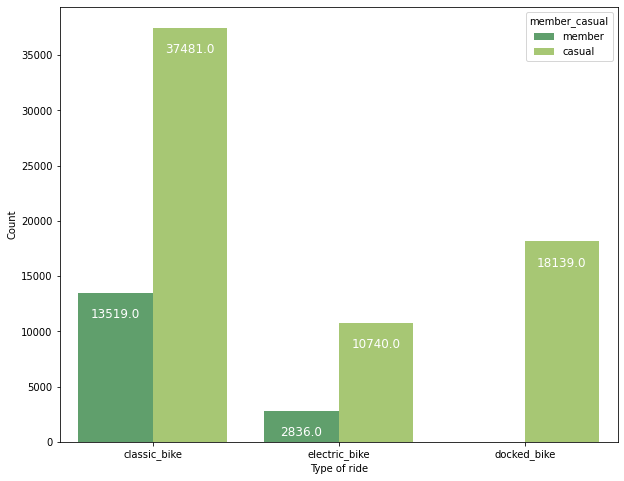

In [23]:
"""
vizualizing the rides from the bussiest station- Streeter Dr & Grand Ave
"""
# to set the figuresize
plt.figure(figsize=(10,8))

# passing the p-s-1 for Streeter Dr & Grand Ave vizualization
peak_station1plot = sns.countplot(x='rideable_type',data=peak_station1, 
              palette='summer',hue='member_casual')

# to annotate the exact numbers
for p in peak_station1plot.patches:
    peak_station1plot.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)
    
# to label the axes
peak_station1plot.set_xlabel("Type of ride")
peak_station1plot.set_ylabel("Count")

# Understanding rides by time of the day

In [24]:
"""
creating a column to get the hour for ride
"""
df['start_hour']  = df.started_at.apply(lambda x: x.hour)



Text(0, 0.5, 'No. of rides')

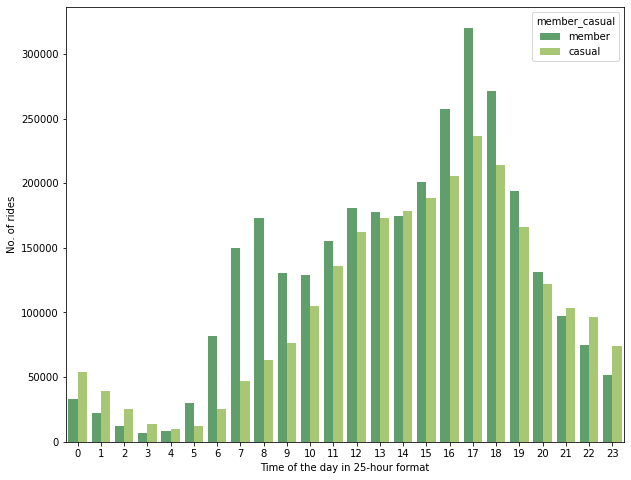

In [25]:
"""
vizualizing the rides from the time of the day
"""
# to set the figuresize
plt.figure(figsize=(10,8))

#
plot = sns.countplot(x='start_hour',data=df, 
              palette='summer', hue='member_casual')


# to label the axes
plot.set_xlabel("Time of the day in 25-hour format")
plot.set_ylabel("No. of rides")


The casual members are high later at night, whereas the memership owners are more during the morning and the afternoon

## Categorizing the rides, similar as above

In [26]:
"""
function to categorize the hours
"""
def f(x):
    if x <= 12 :
        return 'Morning'
    elif x <= 16:
        return'Afternoon'
    elif x <= 20:
        return 'Evening'
    elif x > 20:
        return 'Night'
    

In [27]:
"""
replacing the column to now view category
"""
df['start_hour'] = df.start_hour.apply(lambda x:f(x))

Text(0, 0.5, 'No. of rides')

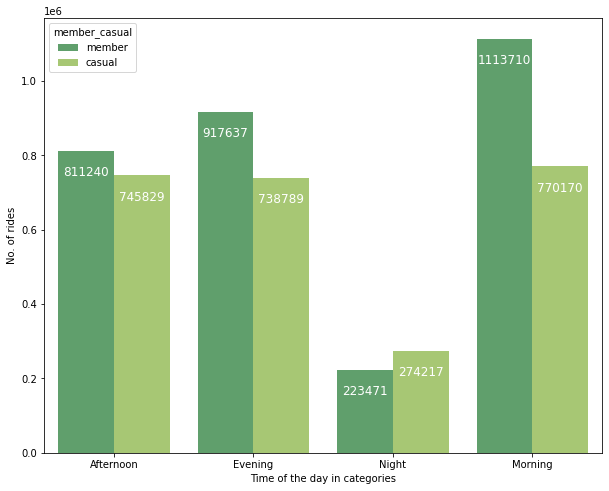

In [28]:
"""
vizualizing the rides from the time of the day
"""
# to set the figuresize
plt.figure(figsize=(10,8))

#
plot = sns.countplot(x='start_hour',data=df, 
              palette='summer', hue='member_casual')

# to annotate the exact numbers
for p in plot.patches:
    plot.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)
    
# to label the axes
plot.set_xlabel("Time of the day in categories")
plot.set_ylabel("No. of rides")